In [2]:
# Developed by Christine Biddlecombe for PUI 2018 HW3
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/
# water consumption in NYC

In [3]:
from __future__ import print_function
import os
import pandas as pd

In [4]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > water.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   5244      0 --:--:-- --:--:-- --:--:--  5267


In [5]:
# creating missing environment variable

os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/cb4221/PUIDATA


In [6]:
# moving the data to PUIDATA
!mv water.csv $PUIDATA

In [7]:
# making sure data was moved to PUIDATA
!ls $PUIDATA

construction_projects.csv  satscores.csv  scores.csv  water.csv


In [8]:
# reading data with pandas
wc = pd.read_csv("%s/water.csv"%os.getenv("PUIDATA"))

In [9]:
# priting top 7 lines
wc.head(7)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182


In [10]:
wc.tail(10)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
29,2008,8141762.0,1098.0,135
30,2009,8158447.5,1007.5,123
31,2010,8175133.0,1039.0,127
32,2011,8284098.0,1021.0,123
33,2012,8361179.0,1009.1,121
34,2013,8422460.0,1006.1,119
35,2014,8471990.0,996.0,118
36,2015,8516502.0,1009.0,118
37,2016,8537673.0,1002.0,117
38,2017,8622698.0,990.2,115


In [11]:
# looking at column names
wc.columns

Index(['Year', 'New York City Population',
       'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [12]:
# selecting 2 columns for plot
wc_2col = wc[['New York City Population', 'Per Capita(Gallons per person per day)']]

In [13]:
wc_2col.head()

,New York City Population,Per Capita(Gallons per person per day)
0,7102100.0,213
1,7071639.0,213
2,7089241.0,185
3,7109105.0,194
4,7181224.0,198


In [14]:
wc_2col.tail()

,New York City Population,Per Capita(Gallons per person per day)
34,8422460.0,119
35,8471990.0,118
36,8516502.0,118
37,8537673.0,117
38,8622698.0,115


In [15]:
wc_2col.plot(x='New York City Population', y='Per Capita(Gallons per person per day)')

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


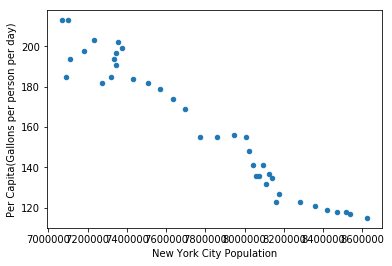

In [21]:
figure = wc_2col.plot(x='New York City Population', y='Per Capita(Gallons per person per day)', kind='scatter')

Figure 1: Per capita gallons of water per day against NYC population. Data are from NYC Department of Environmental Protection from 1979 to 2017. Over the last 40 years, NYC residents have gradually decreased their water usage, a phenomenon I would not necessarily expect. This may be due a conscious effort on the part of New York City residents to use less water and improved efficiency of appliances (dishwashers, washing machines) over the last few decades. 